In [1]:
### K-Means algorithm with load digits dataset from SciKit-Learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [5]:
# import dataset - Load Digits
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())
print(digits.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


In [7]:
# Model import, training and clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

(10, 64)


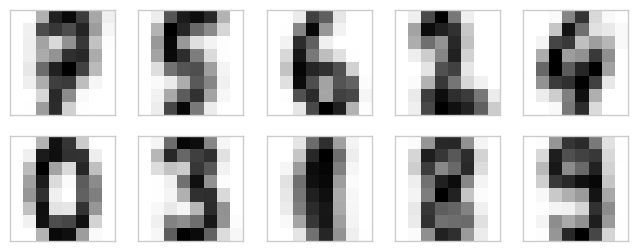

In [9]:
# Visualization of results
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat , centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [11]:
# Label matching
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [13]:
# Accuracy testing
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.8614357262103506

Text(120.78333333333332, 0.5, 'Predicted labels')

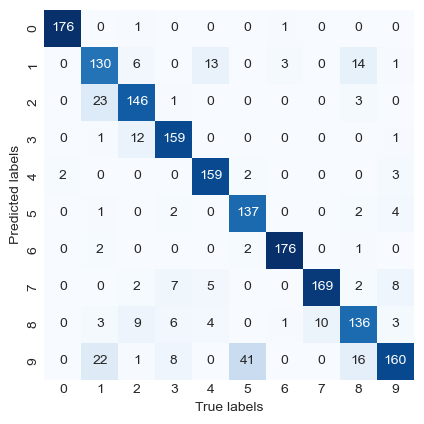

In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
    

In [17]:
# Use of a stochastic method of ordering nearest neighbors based on the t distribution 
# (t-SNE method for manifold learning algorithms - reducing dimensionality).
# This is done in order to transform the data before running the KMeans algorithm.
# t-SNE is a nonlinear algorithm that preserves the membership of points to clusters well.

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
digits_projected = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_projected)

new_labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    new_labels[mask] = mode(digits.target[mask])[0]

In [19]:
# Accuracy testing using t-SNE reducing dimensionality method
accuracy_score(digits.target, new_labels)

0.9415692821368948

In [21]:
# Significantly better results!

Text(120.78333333333332, 0.5, 'Predicted labels')

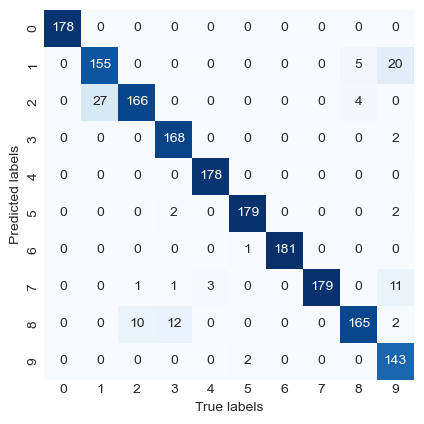

In [23]:
# Confusion matrix for new results
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, new_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names,)
plt.xlabel('True labels')
plt.ylabel('Predicted labels')